# Proyek Analisis Data: Bike-sharing-dataset
- **Nama:** Sulthan Muhammad Rafif Ilham
- **Email:** sulthanrafif@student.ub.ac.id
- **ID Dicoding:** mc006d5y2326


## Menentukan Pertanyaan Bisnis

- Pertanyaan 1: Apakah ada pengaruh signifikan antara kelembapan (humidity) setiap musim dan jumlah penyewaan sepeda?

- Pertanyaan 2: Bagaimana pola penggunaan sepeda di kota berdasarkan jumlah penyewaan pada hari libur dibandingkan dengan hari kerja?



## Import Semua Packages/Library yang Digunakan

In [4]:
# Import library yang digunakan untuk analisis data dan visualisasi
import pandas as pd         # Untuk manipulasi dan analisis data
import numpy as np          # Untuk operasi numerik dan manipulasi data
import matplotlib.pyplot as plt  # Untuk visualisasi grafik
import seaborn as sns       # Untuk visualisasi statistik


Kode ini memuat empat library utama yang sangat berguna dalam analisis data di Python. Pandas dan NumPy digunakan untuk manipulasi dan analisis data, sedangkan Matplotlib dan Seaborn digunakan untuk visualisasi data. Kombinasi dari kedua hal ini memungkinkan pengguna untuk mengolah data dan menampilkan hasil analisis dalam format yang mudah dipahami.

## Data Wrangling

### Gathering Data

Pada tahap ini, saya mengimpor dua dataset yang berbeda, yaitu hour.csv dan day.csv, yang masing-masing berisi data peminjaman sepeda per jam dan per hari. Kedua file tersebut disimpan di Github, yang saya hubungkan dengan Google Colab untuk mempermudah proses akses data.

In [5]:
hour = pd.read_csv("https://raw.githubusercontent.com/Tanbelajarcoding/bikesharingproject/refs/heads/main/Data/hour.csv")
hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [6]:
day = pd.read_csv("https://raw.githubusercontent.com/Tanbelajarcoding/bikesharingproject/refs/heads/main/Data/day.csv")
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Langkah pertama adalah mengimpor dataset hour.csv yang berisi informasi peminjaman sepeda setiap jam. Setelah memuat dataset ini menggunakan pd.read_csv(), saya menggunakan head() untuk menampilkan lima baris pertama dari dataset agar dapat melihat struktur dan isinya.

Selanjutnya, dataset day.csv juga diimpor dengan cara yang sama, dan head() digunakan untuk menampilkan lima baris pertama dari dataset per hari.

**Insight:**
- Perbedaan antara hour.csv dan day.csv: Dataset hour.csv memiliki kolom hr yang menunjukkan waktu dalam satuan jam, yang sangat penting untuk analisis tren peminjaman sepeda berdasarkan waktu dalam sehari. Sementara itu, dataset day.csv hanya mencatat data per hari, tanpa informasi jam.


- Berdasarkan pertanyaan bisnis yang diajukan sebelumnya, kolom hr pada dataset hour.csv sangat dibutuhkan untuk analisis lebih rinci tentang pola peminjaman sepeda per jam. Oleh karena itu, dataset hour.csv akan digunakan dalam proyek ini.

### Assessing Data

In [7]:
hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Pada tahap ini, saya melakukan pemeriksaan awal terhadap dataset hour.csv yang telah diimpor. Langkah pertama adalah menggunakan info() untuk menampilkan informasi umum mengenai dataset, seperti jumlah baris, jumlah kolom, serta tipe data untuk setiap kolom. Hasil dari perintah ini menunjukkan bahwa dataset memiliki 17.379 baris dan 16 kolom. Berikut adalah beberapa hal yang dapat diambil dari informasi ini:

In [8]:
hour.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


Setelah itu, saya juga menjalankan isna().sum() untuk memeriksa apakah ada nilai yang hilang (missing values) dalam dataset. Hasilnya menunjukkan bahwa tidak ada kolom yang mengandung nilai yang hilang atau NaN, yang berarti dataset ini sudah bersih dari data yang hilang.

**Insight:**
- Tidak ada nilai yang hilang: Berdasarkan hasil dari isna().sum(), semua kolom dalam dataset ini memiliki nilai yang lengkap, tanpa adanya data yang hilang. Ini mempermudah proses analisis karena tidak perlu menangani missing values.
- Data Siap untuk Analisis: Dataset ini dapat langsung digunakan untuk analisis lebih lanjut tanpa perlu dilakukan pembersihan data terkait nilai yang hilang. Semua kolom sudah terisi lengkap.

In [9]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Sama seperti sebelumnya, pada tahap ini, saya melakukan pengecekan terhadap dataset day.csv yang berisi informasi peminjaman sepeda per hari. Langkah pertama adalah menggunakan info() untuk mendapatkan gambaran umum tentang dataset ini.

In [10]:
day.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


Selanjutnya, saya menjalankan isna().sum() untuk memeriksa apakah ada nilai yang hilang dalam dataset. Hasilnya menunjukkan bahwa semua kolom dalam dataset ini lengkap tanpa adanya nilai yang hilang (NaN).

**Insight:**
- Tidak Ada Nilai yang Hilang: Berdasarkan hasil dari isna().sum(), dataset day.csv tidak mengandung nilai yang hilang pada kolom manapun, yang berarti data sudah siap untuk dianalisis lebih lanjut tanpa perlu melakukan pembersihan terkait nilai yang hilang.
- Memori yang Efisien: Dengan ukuran memori dataset yang hanya 91.5 KB, dataset ini sangat efisien dan tidak memerlukan banyak sumber daya untuk diproses, sehingga mempermudah analisis lebih lanjut.

In [11]:
print("Jumlah baris yang duplikat: ", hour.duplicated().sum())

Jumlah baris yang duplikat:  0


In [12]:
hour.describe()


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Pada tahap ini, saya melakukan dua hal untuk memeriksa kualitas data:

1. Memeriksa Duplikasi:
Menggunakan kode hour.duplicated().sum(), saya memeriksa apakah ada baris yang duplikat dalam dataset. Hasilnya menunjukkan bahwa tidak ada baris yang duplikat, yang berarti data sudah bebas dari duplikasi.

2. Deskripsi Dataset:
Untuk lebih memahami karakteristik dari dataset, saya menggunakan describe() untuk menghasilkan statistik deskriptif dari data numerik.


**Insight:**
Tidak Ada Data Duplikat: Tidak ada baris yang duplikat dalam dataset, yang berarti data sudah bersih dari entri yang berulang.

### Cleaning Data

In [13]:
drop_col = ['instant', 'temp', 'yr', 'mnth', 'hr', 'weekday', 'workingday', 'weathersit', 'windspeed', 'casual', 'registered']

for i in hour.columns:
  if i in drop_col:
    hour.drop(labels=i, axis=1, inplace=True)
hour.columns


Index(['dteday', 'season', 'holiday', 'atemp', 'hum', 'cnt'], dtype='object')

Penyederhanaan Dataset: Dengan menghapus kolom-kolom yang tidak relevan, dataset menjadi lebih sederhana dan hanya berfokus pada informasi yang penting untuk analisis lebih lanjut.

Kolom yang Tersisa: Setelah penghapusan, kolom-kolom yang tersisa adalah kolom yang lebih relevan untuk analisis, seperti dteday (tanggal), season (musim), holiday (status hari libur), temp (suhu), hum (kelembapan), dan cnt (total peminjaman sepeda).

In [14]:
hour.rename(columns={
    'dteday': 'dateday',
    'yr': 'year',
    'mnth': 'month',
    'hr': 'hour',
    'weathersit': 'weathersituation',
    'hum': 'humidity',
    'cnt': 'count'
}, inplace=True)

Pada tahap ini, saya melakukan perubahan nama pada beberapa kolom dalam dataset hour agar lebih mudah dipahami dan sesuai dengan konteks analisis. Proses ini dilakukan dengan menggunakan fungsi rename()

In [15]:
# Mengubah token pada kolom season menjadi nama musim dalam setahun dalam bahasa inggris
hour['season'] = hour['season'].replace({
    1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'
})

hour

,dateday,season,holiday,atemp,humidity,count
0,2011-01-01,Spring,0,0.2879,0.81,16
1,2011-01-01,Spring,0,0.2727,0.80,40
2,2011-01-01,Spring,0,0.2727,0.80,32
3,2011-01-01,Spring,0,0.2879,0.75,13
4,2011-01-01,Spring,0,0.2879,0.75,1
...,...,...,...,...,...,...
17374,2012-12-31,Spring,0,0.2576,0.60,119
17375,2012-12-31,Spring,0,0.2576,0.60,89
17376,2012-12-31,Spring,0,0.2576,0.60,90
17377,2012-12-31,Spring,0,0.2727,0.56,61


Pada tahap ini, saya melakukan pengubahan nilai yang ada pada kolom season menjadi nama musim dalam bahasa Inggris. Kolom season awalnya berisi angka yang mewakili musim tertentu, seperti:

1: Spring
2: Summer
3: Fall
4: Winter

Pengubahan nilai pada kolom season ini bertujuan untuk membuat data lebih intuitif dan deskriptif, yang akan membantu dalam proses analisis lebih lanjut terkait pengaruh musim terhadap pola peminjaman sepeda.

In [16]:
# Mengubah tipe data kolom dateday dari object ke datetime
hour['dateday'] = pd.to_datetime(hour.dateday)
hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   dateday   17379 non-null  datetime64[ns]
 1   season    17379 non-null  object        
 2   holiday   17379 non-null  int64         
 3   atemp     17379 non-null  float64       
 4   humidity  17379 non-null  float64       
 5   count     17379 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(1)
memory usage: 814.8+ KB


Pada tahap ini, saya mengubah tipe data pada kolom dateday dari object menjadi datetime64. Ini dilakukan agar kolom tanggal dapat diproses dengan lebih efisien dan memudahkan analisis yang melibatkan manipulasi tanggal.

Proses Pengubahan:
Menggunakan pd.to_datetime():

Fungsi pd.to_datetime() digunakan untuk mengubah kolom dateday yang awalnya berisi string atau objek (object) menjadi tipe data datetime64, yang memungkinkan kita untuk melakukan operasi berbasis waktu seperti ekstraksi tahun, bulan, atau hari dari tanggal tersebut.
Hasil:

Setelah pengubahan, kolom dateday akan memiliki tipe data datetime64 yang lebih sesuai untuk analisis waktu, seperti perbandingan antar tanggal, filtering berdasarkan tanggal, dan lainnya.

**Insight:**
- Penyederhanaan dataset membantu memperjelas data yang digunakan dalam analisis dan mengurangi kompleksitas.

- Mengganti nama kolom membuat dataset lebih mudah dipahami dan menghindari kebingunguan saat berinteraksi dengan data.

- Mengganti angka dengan nama musim meningkatkan keterbacaan dan memudahkan analisis musiman pada dataset.

- Mengubah tipe data memungkinkan analisis waktu yang lebih efisien, seperti ekstraksi bulan, tahun, atau hari untuk melihat tren peminjaman sepeda sepanjang waktu.

## Exploratory Data Analysis (EDA)

### Explore ...

In [17]:
hour.describe(include="all")


,dateday,season,holiday,atemp,humidity,count
count,17379,17379,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,4,NaN,NaN,NaN,NaN
top,NaN,Fall,NaN,NaN,NaN,NaN
freq,NaN,4496,NaN,NaN,NaN,NaN
mean,2012-01-02 04:08:34.552045568,NaN,0.028770,0.475775,0.627229,189.463088
min,2011-01-01 00:00:00,NaN,0.000000,0.000000,0.000000,1.000000
25%,2011-07-04 00:00:00,NaN,0.000000,0.333300,0.480000,40.000000
50%,2012-01-02 00:00:00,NaN,0.000000,0.484800,0.630000,142.000000
75%,2012-07-02 00:00:00,NaN,0.000000,0.621200,0.780000,281.000000
max,2012-12-31 00:00:00,NaN,1.000000,1.000000,1.000000,977.000000


Saya menggunakan fungsi describe(include="all") untuk memeriksa statistik deskriptif dari dataset hour. Hasilnya menunjukkan bahwa kolom season hanya memiliki 4 nilai unik yang mewakili empat musim: Fall, Summer, Spring, dan Winter. Musim Fall memiliki frekuensi tertinggi dengan 4.496 entri. Kolom holiday menunjukkan bahwa sebagian besar data bukan pada hari libur (nilai rata-rata 0.03). Selain itu, kolom suhu yang disesuaikan (atemp) memiliki rata-rata 0.475, dan kolom kelembapan (humidity) memiliki rata-rata 0.627. Rata-rata jumlah sepeda yang dipinjam (count) adalah 189, dengan nilai maksimum mencapai 977 sepeda. Secara keseluruhan, langkah pertama memberikan gambaran umum tentang distribusi data dalam dataset, termasuk musim, suhu, kelembapan, dan peminjaman sepeda.

In [18]:
hour.groupby(by="season").agg({
    "count": ["sum"]
})

,count
,sum
season,
Fall,1061129
Spring,471348
Summer,918589
Winter,841613


Saya melakukan agregasi data berdasarkan kolom season untuk melihat total jumlah sepeda yang dipinjam di setiap musim. Dengan menggunakan fungsi groupby() dan agg(), saya menghitung total peminjaman sepeda (count) untuk masing-masing musim. Hasilnya menunjukkan bahwa musim Fall memiliki jumlah peminjaman sepeda tertinggi, yaitu 1.061.129 sepeda, diikuti oleh Summer dengan 918.589 sepeda, Winter dengan 841.613 sepeda, dan Spring dengan jumlah peminjaman terendah, yaitu 471.348 sepeda. Hal ini menunjukkan bahwa permintaan sepeda lebih tinggi pada musim gugur dan panas dibandingkan musim lainnya.

In [19]:
hour.groupby(by="holiday").agg({
    "count": ["sum"]
})

,count
,sum
holiday,
0,3214244
1,78435


Saya melakukan agregasi data berdasarkan kolom holiday untuk melihat total peminjaman sepeda pada hari libur dan bukan hari libur. Menggunakan fungsi groupby() dan agg(), saya menghitung total peminjaman sepeda (count) untuk hari libur (holiday = 1) dan hari biasa (holiday = 0). Hasilnya menunjukkan bahwa pada hari biasa (nilai 0 untuk kolom holiday), jumlah peminjaman sepeda mencapai 3.214.244 sepeda, sedangkan pada hari libur (nilai 1 untuk kolom holiday), jumlah peminjaman jauh lebih rendah, yaitu 78.435 sepeda. Ini menunjukkan bahwa peminjaman sepeda lebih sering terjadi pada hari-hari biasa dibandingkan pada hari libur.

In [20]:
hour.groupby(by="humidity").agg({
    "humidity" : "count",
    "count": ["sum"]
})

,humidity,count
,count,sum
humidity,,
0.00,22,623
0.08,1,77
0.10,1,107
0.12,1,29
0.13,1,17
...,...,...
0.93,331,21972
0.94,560,52601


Saya melakukan agregasi data berdasarkan kolom humidity untuk menganalisis total peminjaman sepeda pada berbagai tingkat kelembapan. Dengan menggunakan fungsi groupby() dan agg(), saya menghitung jumlah peminjaman sepeda (count) pada setiap tingkat kelembapan (humidity). Hasilnya menunjukkan bahwa pada tingkat kelembapan 0.00, terdapat 623 peminjaman sepeda, sementara tingkat kelembapan 1.00 memiliki 18.569 peminjaman sepeda. Hal ini menunjukkan bahwa pada tingkat kelembapan yang lebih tinggi, jumlah peminjaman sepeda juga lebih banyak, dengan puncaknya terjadi pada kelembapan 1.00. Ini mengindikasikan bahwa cuaca yang lebih lembap mungkin lebih mendukung aktivitas peminjaman sepeda.

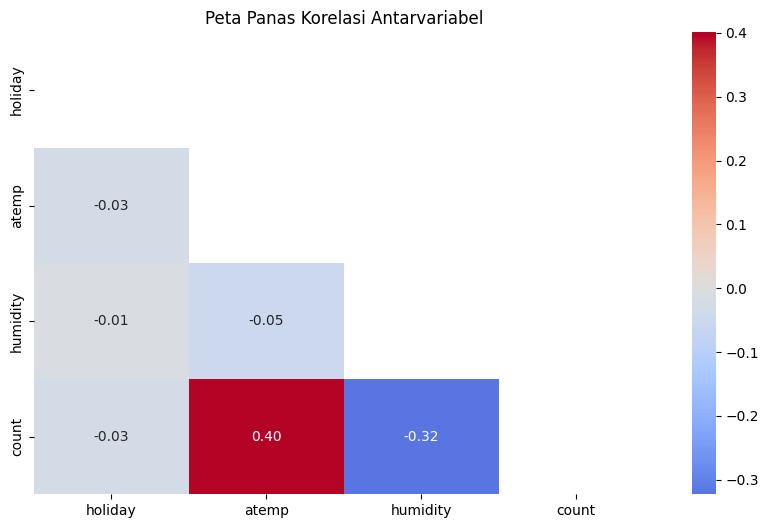

In [21]:
# Membuat figure dan axes dengan ukuran 10x6
fig, ax = plt.subplots(figsize=(10, 6))

# Menghitung matriks korelasi hanya untuk kolom numerik
correlation_matrix = hour.corr(numeric_only=True)

# Membuat mask untuk menampilkan hanya bagian bawah dari matriks korelasi
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Membuat heatmap korelasi dengan warna "coolwarm" dan menampilkan nilai korelasi
sns.heatmap(
    correlation_matrix,
    annot=True,         # Menampilkan nilai dalam setiap sel
    mask=mask,          # Menyembunyikan bagian atas matriks
    cmap="coolwarm",    # Menggunakan skema warna coolwarm
    center=0,           # Menjadikan 0 sebagai titik tengah warna
    fmt=".2f"           # Format angka dengan dua desimal
)

# Menambahkan judul pada heatmap
plt.title("Peta Panas Korelasi Antarvariabel")

# Menampilkan plot
plt.show()

saya membuat heatmap korelasi antarvariabel untuk menggambarkan hubungan antar kolom dalam dataset. Menggunakan sns.heatmap(), saya menghitung matriks korelasi antar kolom numerik seperti holiday, atemp (suhu), humidity, dan count (jumlah peminjaman sepeda). Dari heatmap, terlihat bahwa korelasi tertinggi ada antara atemp dan count dengan nilai 0.40, yang menunjukkan bahwa suhu lebih tinggi berkorelasi positif dengan jumlah peminjaman sepeda. Sementara itu, korelasi negatif terlihat antara humidity dan count dengan nilai -0.32, yang menunjukkan bahwa kelembapan lebih tinggi berhubungan dengan penurunan peminjaman sepeda. Korelasi antara holiday dan variabel lainnya sangat rendah, menunjukkan bahwa hari libur tidak memiliki pengaruh signifikan terhadap peminjaman sepeda.

**Insight:**
- Distribusi Musim: Musim Fall memiliki jumlah peminjaman sepeda tertinggi, diikuti oleh Summer, Winter, dan Spring yang memiliki jumlah peminjaman sepeda lebih rendah. Ini menunjukkan bahwa permintaan sepeda lebih tinggi pada musim gugur dan panas.
- Hari Libur: Sebagian besar peminjaman sepeda terjadi pada hari biasa (nilai 0 untuk kolom holiday), dengan hanya sekitar 3% data yang mencatat hari libur. Pemakaian sepeda lebih rendah pada hari libur dibandingkan hari biasa.
- Kelembapan: Korelasi antara humidity dan jumlah peminjaman sepeda (count) menunjukkan hubungan negatif (-0.32), yang berarti semakin tinggi kelembapan, jumlah peminjaman sepeda cenderung berkurang. Selain itu, ada variasi kelembapan yang cukup besar dalam dataset, dengan rata-rata kelembapan sekitar 0.627.
- Suhu (atemp): atemp (suhu yang disesuaikan) memiliki korelasi positif dengan jumlah peminjaman sepeda (0.40), menunjukkan bahwa peminjaman sepeda lebih tinggi pada suhu yang lebih tinggi. Suhu rata-rata adalah sekitar 0.475.
- Hubungan antarvariabel: Heatmap korelasi menunjukkan bahwa atemp memiliki hubungan positif yang signifikan dengan count, sementara humidity memiliki korelasi negatif dengan count. Korelasi dengan holiday sangat rendah, menunjukkan bahwa hari libur tidak terlalu mempengaruhi jumlah peminjaman sepeda.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

Pada visualisasi scatter plot, saya menganalisis hubungan antara kelembapan (humidity) dan jumlah peminjaman sepeda (count) untuk setiap musim. Setiap titik mewakili satu entri dengan nilai kelembapan dan jumlah peminjaman sepeda tertentu, dengan warna titik menunjukkan musim terkait (Spring, Summer, Fall, Winter). Hasil dari plot ini memperlihatkan distribusi peminjaman sepeda berdasarkan berbagai tingkat kelembapan, di mana titik-titik yang mewakili musim yang berbeda memiliki pola distribusi yang bervariasi. Meskipun tidak ada pola linier yang jelas, visualisasi ini memberikan wawasan tentang bagaimana peminjaman sepeda tersebar di berbagai tingkat kelembapan pada setiap musim.

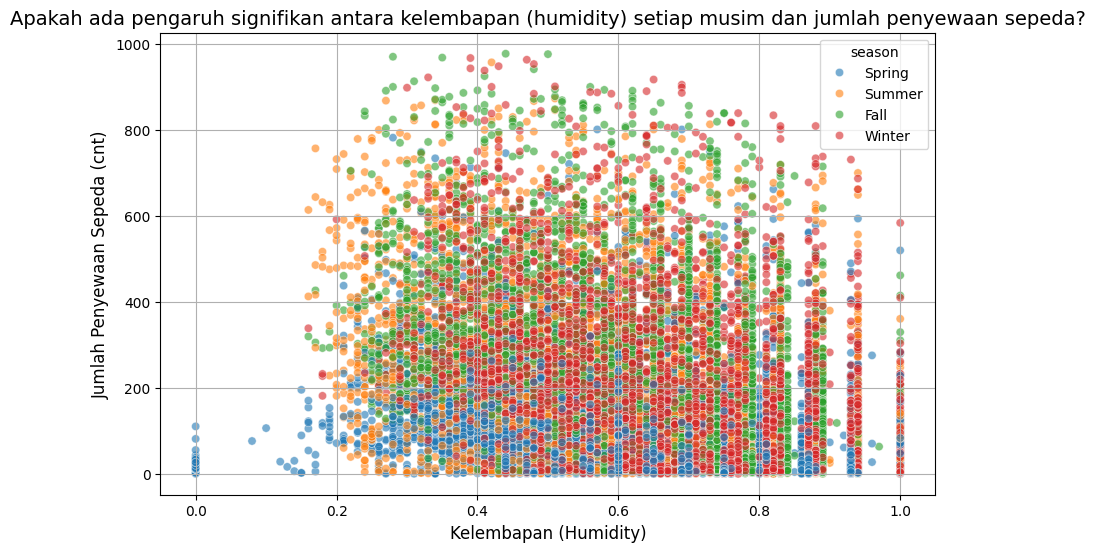

In [22]:
# filtered_hour = hour[hour['season'].isin(['Summer'])]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=hour, x='humidity', y='count', alpha=0.6, hue = "season")
plt.title('Apakah ada pengaruh signifikan antara kelembapan (humidity) setiap musim dan jumlah penyewaan sepeda?', fontsize=14)
plt.xlabel('Kelembapan (Humidity)', fontsize=12)
plt.ylabel('Jumlah Penyewaan Sepeda (cnt)', fontsize=12)
plt.grid(True)
plt.show()

**Insight:**
- Pengaruh Kelembapan terhadap Peminjaman Sepeda: Tidak terlihat adanya korelasi yang signifikan antara kelembapan dan jumlah peminjaman sepeda. Peminjaman sepeda terjadi merata di seluruh rentang kelembapan, baik pada kelembapan rendah maupun tinggi.
- Variasi Antar Musim: Musim Fall dan Summer menunjukkan variasi peminjaman sepeda yang lebih besar di berbagai tingkat kelembapan, sementara Winter dan Spring lebih terfokus pada kelembapan rendah, dengan peminjaman sepeda yang lebih sedikit pada kelembapan yang sangat tinggi.

Kesimpulan: Meskipun kelembapan mempengaruhi distribusi peminjaman sepeda, faktor lain, seperti suhu atau keadaan cuaca lainnya, kemungkinan memiliki pengaruh yang lebih besar terhadap jumlah peminjaman sepeda. Variasi antar musim juga menunjukkan bahwa peminjaman sepeda lebih dipengaruhi oleh kondisi musiman daripada hanya kelembapan.

### Pertanyaan 2:

Pada visualisasi ini, saya menghitung rata-rata jumlah peminjaman sepeda berdasarkan apakah hari tersebut adalah hari libur atau hari kerja. Data dikelompokkan berdasarkan kolom holiday, yang bernilai 0 untuk hari kerja (bukan libur) dan 1 untuk hari libur. Kemudian, saya menghitung rata-rata peminjaman sepeda (count) untuk kedua kategori tersebut. Hasilnya divisualisasikan dalam bentuk bar plot, yang membandingkan jumlah rata-rata peminjaman sepeda pada hari kerja dan hari libur.

<ipython-input-23-14c08ca305a3>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=holiday_data.index, y=holiday_data.values, palette="Blues_d")


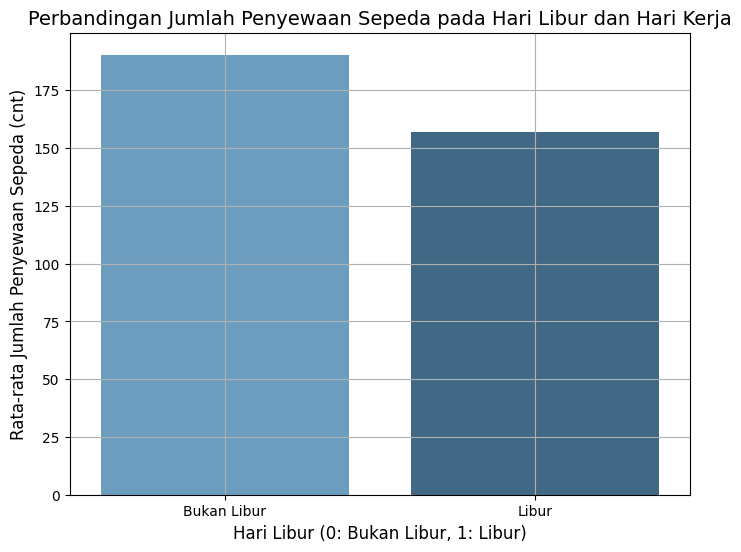

In [23]:
# Group the data by holiday (0 = not a holiday, 1 = holiday) and calculate the average bike rentals (cnt)
holiday_data = hour.groupby('holiday')['count'].mean()

# Visualize the comparison of bike rentals on holidays vs working days
plt.figure(figsize=(8, 6))
sns.barplot(x=holiday_data.index, y=holiday_data.values, palette="Blues_d")
plt.title('Perbandingan Jumlah Penyewaan Sepeda pada Hari Libur dan Hari Kerja', fontsize=14)
plt.xlabel('Hari Libur (0: Bukan Libur, 1: Libur)', fontsize=12)
plt.ylabel('Rata-rata Jumlah Penyewaan Sepeda (cnt)', fontsize=12)
plt.xticks([0, 1], ['Bukan Libur', 'Libur'])
plt.grid(True)
plt.show()

**Insight:**
- Rata-rata Peminjaman pada Hari Kerja vs Hari Libur: Dari bar plot, terlihat bahwa rata-rata jumlah peminjaman sepeda pada hari kerja (bukan libur) lebih tinggi dibandingkan dengan pada hari libur. Rata-rata peminjaman sepeda pada hari kerja lebih dari 175 sepeda, sedangkan pada hari libur hanya sekitar 150 sepeda.

Kesimpulan: Pemakaian sepeda cenderung lebih tinggi pada hari kerja dibandingkan dengan hari libur. Hal ini mungkin mencerminkan penggunaan sepeda yang lebih banyak untuk kebutuhan harian, seperti transportasi ke tempat kerja atau sekolah, dibandingkan dengan hari libur, yang mungkin dipengaruhi oleh aktivitas lain yang tidak melibatkan sepeda.

## Analisis Lanjutan: Bagaimana pola penggunaan sepeda berbeda antara musim panas dan musim dingin, serta bagaimana cuaca memengaruhi tingkat penyewaan?

Tujuan dari visualisasi ini adalah untuk menggambarkan hubungan antara suhu yang dirasakan (atemp) dengan jumlah penyewaan sepeda (count) di dua musim, yaitu Summer dan Winter. Dengan ini, kita dapat memahami bagaimana suhu memengaruhi jumlah penyewaan sepeda di kedua musim yang sangat berbeda, yakni musim panas (Summer) yang lebih hangat dan musim dingin (Winter) yang lebih sejuk.

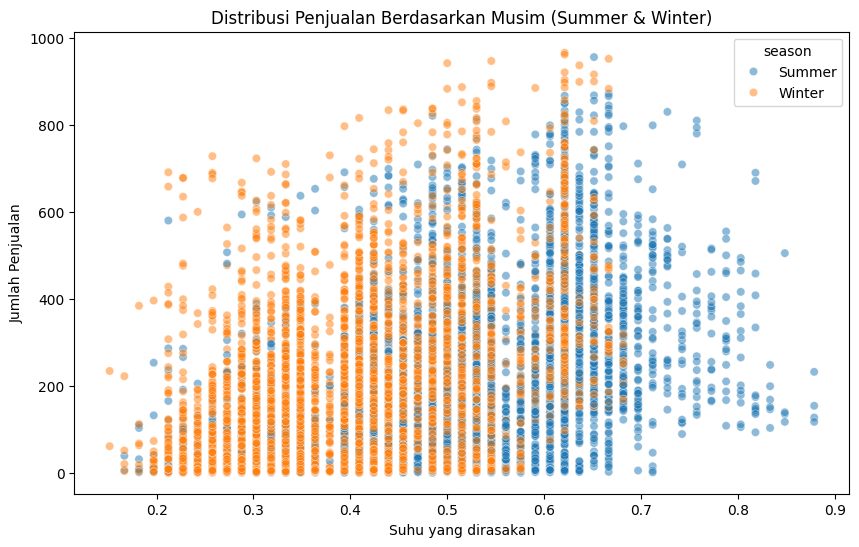

In [24]:
plt.figure(figsize=(10, 6))

# Filter hanya musim Spring dan Winter
filtered_hour = hour[hour['season'].isin(['Summer', 'Winter'])]

sns.scatterplot(
    x='atemp',
    y='count',
    data=filtered_hour,
    hue='season',
    alpha=0.5
)

plt.title('Distribusi Penjualan Berdasarkan Musim (Summer & Winter)')
plt.xlabel('Suhu yang dirasakan')
plt.ylabel('Jumlah Penjualan')

plt.show()

Sumbu X (Suhu yang Dirasakan - atemp): Ini menunjukkan suhu yang dirasakan oleh pengguna sepeda, yang dapat bervariasi dari 0 hingga 1. Nilai ini menggambarkan suhu normal pada hari tersebut dengan normalisasi data.

Sumbu Y (Jumlah Penjualan - count): Menunjukkan total jumlah sepeda yang disewa pada hari tertentu.

Pewarnaan berdasarkan Musim: Titik pada grafik diwarnai dengan dua kategori musim, yaitu Summer (musim panas) dengan warna biru dan Winter (musim dingin) dengan warna oranye. Hal ini memudahkan untuk membandingkan penyewaan sepeda pada suhu yang berbeda untuk kedua musim tersebut.

**Insight:**
- Hubungan antara Suhu dan Penyewaan:
  - Musim Panas (Summer): Dapat terlihat bahwa pada musim panas, meskipun ada rentang suhu yang cukup besar (dari suhu rendah hingga tinggi), jumlah penyewaan sepeda relatif tinggi pada suhu yang lebih panas, meskipun ada sedikit penurunan pada suhu yang lebih tinggi (lebih mendekati 1).
  - Musim Dingin (Winter): Pada musim dingin, terdapat penurunan yang lebih jelas pada jumlah penyewaan sepeda seiring dengan meningkatnya suhu. Penyewaan sepeda lebih tinggi pada suhu yang lebih rendah.

- Perbandingan antara Musim:
  - Pada musim panas, meskipun suhu yang lebih tinggi cenderung mendekati titik teratas (1), jumlah penyewaan tetap relatif tinggi, menunjukkan bahwa pengguna sepeda lebih aktif pada musim panas.
  - Di sisi lain, pada musim dingin, penyewaan sepeda berkurang seiring dengan meningkatnya suhu, mengindikasikan bahwa sepeda cenderung digunakan lebih sedikit ketika suhu lebih tinggi, yang lebih sesuai dengan musim dingin yang lebih sejuk.


## Conclusion



```
# This is formatted as code
```

- Pengaruh Kelembapan terhadap Penyewaan Sepeda (Pertanyaan 1):

  Tidak Ada Korelasi Signifikan: Tidak ditemukan korelasi yang jelas antara kelembapan (humidity) dan jumlah peminjaman sepeda pada setiap musim. Meskipun ada variasi berdasarkan musim, faktor lain seperti suhu atau cuaca lebih mungkin berpengaruh terhadap penyewaan sepeda.
  Variasi Antara Musim: Musim Fall dan Summer menunjukkan variasi yang lebih besar dalam penyewaan sepeda pada berbagai tingkat kelembapan, sementara Winter dan Spring cenderung lebih terfokus pada kelembapan rendah.

- Perbandingan Penyewaan Sepeda pada Hari Libur dan Hari Kerja (Pertanyaan 2):
  
  Penyewaan Sepeda Lebih Tinggi pada Hari Kerja: Rata-rata peminjaman sepeda pada hari kerja lebih tinggi daripada pada hari libur. Hal ini mencerminkan penggunaan sepeda untuk aktivitas rutin, seperti transportasi ke tempat kerja atau sekolah, sementara pada hari libur, penggunaan sepeda lebih sedikit.

- Pola Penggunaan Sepeda Berdasarkan Suhu Musim Panas dan Musim Dingin (Analisis Lanjutan):
  - Musim Panas: Penyewaan sepeda relatif tinggi pada suhu yang lebih tinggi, meskipun ada sedikit penurunan ketika suhu mendekati titik teratas. Hal ini menunjukkan bahwa pengguna lebih aktif menggunakan sepeda pada musim panas.
  - Musim Dingin: Penyewaan sepeda lebih tinggi pada suhu rendah, dan penurunan jumlah penyewaan terjadi seiring dengan meningkatnya suhu, mengindikasikan bahwa penggunaan sepeda lebih terfokus pada suhu yang lebih sejuk.

Faktor suhu, baik pada musim panas maupun musim dingin, memainkan peran yang lebih signifikan dalam mempengaruhi jumlah penyewaan sepeda dibandingkan dengan kelembapan.
Penyewaan sepeda lebih tinggi pada hari kerja dibandingkan dengan hari libur, mengindikasikan bahwa sepeda lebih banyak digunakan untuk kegiatan sehari-hari.
Variasi musiman berpengaruh besar terhadap pola penggunaan sepeda, dengan musim panas dan dingin menunjukkan pola yang berbeda berdasarkan suhu yang dirasakan.

In [25]:
hour.to_csv("hour_df.csv", index=False)
